In [32]:
    from scapy.all import *
    import pandas as pd
    import matplotlib.pyplot as plt

    # 1. Capturar 10 paquetes y guardarlos en un archivo pcap
    packets = sniff(count=30)
    wrpcap('captura.pcap', packets)

    # Imprimir tipo de datos, longitud y contenido del archivo pcap
    pcap = rdpcap('captura.pcap')
    print('Tipo de datos:', type(pcap))
    print('Longitud:', len(pcap))
    print('Contenido:', pcap.show())

    # 2. Agregar el archivo analisis_paquetes.pcap a la captura anterior
    packets2 = rdpcap('analisis_paquetes.pcap')
    pcap.extend(packets2)
    wrpcap('captura.pcap', pcap)

    # 3. Convertir el pcap a un DataFrame
    data = {'Src Address': [], 'Dst Address': [], 'Src Port': [], 'Dst Port': [], 'Payload': []}
    for pkt in pcap:
        try:
            src = pkt['IP'].src
            dst = pkt['IP'].dst
            sport = pkt['TCP'].sport
            dport = pkt['TCP'].dport
            payload = pkt['Raw'].load
        except:
            continue
        data['Src Address'].append(src)
        data['Dst Address'].append(dst)
        data['Src Port'].append(sport)
        data['Dst Port'].append(dport)
        data['Payload'].append(len(payload))
    df = pd.DataFrame(data)


# 4. Mostrar los valores de las columnas solicitadas
df






Tipo de datos: <class 'scapy.plist.PacketList'>
Longitud: 30
0000 Ether / IP / TCP 20.50.73.11:https > 192.168.0.5:50485 A / Padding
0001 Ether / IP / TCP 20.50.73.11:https > 192.168.0.5:50485 FPA / Raw
0002 Ether / IP / TCP 192.168.0.5:50485 > 20.50.73.11:https A
0003 Ether / IP / TCP 192.168.0.5:50485 > 20.50.73.11:https PA / Raw
0004 Ether / IP / TCP 192.168.0.5:50485 > 20.50.73.11:https FA
0005 Ether / IP / TCP 20.50.73.11:https > 192.168.0.5:50485 A / Padding
0006 Ether / IP / UDP 192.168.100.3:57726 > 239.255.255.250:ssdp / Raw
0007 Ether / IP / UDP 192.168.100.3:57726 > 239.255.255.250:ssdp / Raw
0008 Ether / IP / UDP 192.168.100.3:57726 > 239.255.255.250:ssdp / Raw
0009 Ether / IP / TCP 192.168.0.5:50486 > 13.107.5.93:https S
0010 Ether / IP / TCP 192.168.0.5:49870 > 192.168.0.2:8008 A / Raw
0011 Ether / IP / TCP 192.168.0.2:8008 > 192.168.0.5:49870 A
0012 Ether / IP / TCP 13.107.5.93:https > 192.168.0.5:50486 SA
0013 Ether / IP / TCP 192.168.0.5:50486 > 13.107.5.93:https A
001

,Src Address,Dst Address,Src Port,Dst Port,Payload
0,20.50.73.11,192.168.0.5,443,50485,471
1,192.168.0.5,20.50.73.11,50485,443,31
2,192.168.0.5,192.168.0.2,49870,8008,1
3,192.168.0.5,13.107.5.93,50486,443,534
4,13.107.5.93,192.168.0.5,443,50486,145
5,192.168.0.5,13.107.5.93,50486,443,551
6,192.168.0.5,13.107.5.93,50487,443,534
7,13.107.5.93,192.168.0.5,443,50487,1460
8,13.107.5.93,192.168.0.5,443,50487,1460
9,13.107.5.93,192.168.0.5,443,50487,1219


In [24]:
# 5. Estadísticas
print('IP origen más frecuente:', df['Src Address'].mode()[0])
print('IP destino más frecuente:', df['Dst Address'].mode()[0])
ip_a = df['Src Address'].mode()[0]
print('IPs a las que se comunica la IP del inciso a:', df[df['Src Address']==ip_a]['Dst Address'].unique())
print('Puertos destino a los que se comunica la IP del inciso a:', df[df['Src Address']==ip_a]['Dst Port'].unique())
ip_b = df['Dst Address'].mode()[0]
print('Puertos origen a los que se comunica la IP del inciso b:', df[df['Dst Address']==ip_b]['Src Port'].unique())
ports_d = df['Dst Port'].value_counts().head(2).index.to_list()
print('Propósito de los puertos que más aparecen en los incisos d:', ports_d)
ports_e = df['Src Port'].value_counts().head(2).index.to_list()
print('Propósito de los puertos que más aparecen en los incisos e:', ports_e)


IP origen más frecuente: 20.189.173.4
IP destino más frecuente: 192.168.0.5
IPs a las que se comunica la IP del inciso a: ['192.168.0.5']
Puertos destino a los que se comunica la IP del inciso a: [50400]
Puertos origen a los que se comunica la IP del inciso b: [443]
Propósito de los puertos que más aparecen en los incisos d: [50400, 443]
Propósito de los puertos que más aparecen en los incisos e: [443, 50400]


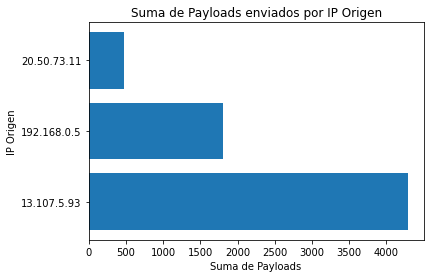

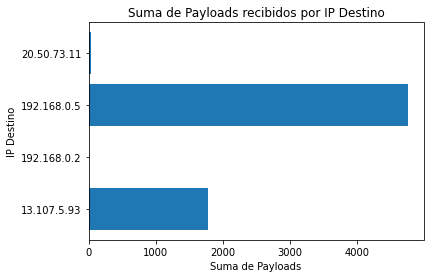

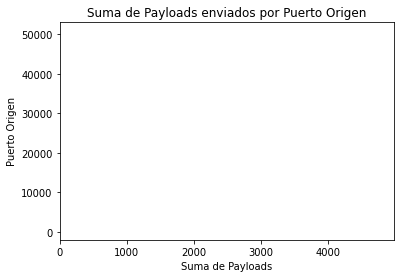

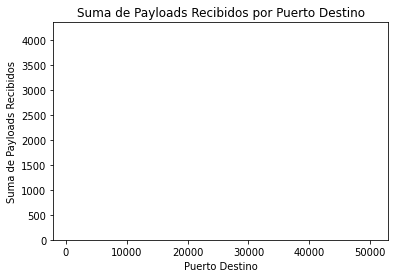

In [35]:

# Gráfico a
src_payloads = df.groupby('Src Address')['Payload'].sum().reset_index(name='Payload')
plt.barh(src_payloads['Src Address'], src_payloads['Payload'])
plt.xlabel('Suma de Payloads')
plt.ylabel('IP Origen')
plt.title('Suma de Payloads enviados por IP Origen')
plt.show()

# Gráfico b
dst_payloads = df.groupby('Dst Address')['Payload'].sum().reset_index(name='Payload')
plt.barh(dst_payloads['Dst Address'], dst_payloads['Payload'])
plt.xlabel('Suma de Payloads')
plt.ylabel('IP Destino')
plt.title('Suma de Payloads recibidos por IP Destino')
plt.show()

# Gráfico c
src_port_payloads = df.groupby('Src Port')['Payload'].sum().reset_index(name='Payload')
plt.barh(src_port_payloads['Src Port'], src_port_payloads['Payload'])
plt.xlabel('Suma de Payloads')
plt.ylabel('Puerto Origen')
plt.title('Suma de Payloads enviados por Puerto Origen')
plt.show()

# Suma de payloads recibidos por puerto destino
dst_payloads = df.groupby('Dst Port')['Payload'].sum().reset_index(name='Payload')

# Grafica d
plt.bar(dst_payloads['Dst Port'], dst_payloads['Payload'])
plt.xlabel('Puerto Destino')
plt.ylabel('Suma de Payloads Recibidos')
plt.title('Suma de Payloads Recibidos por Puerto Destino')
plt.show()


In [38]:
most_common_src = df['Src Address'].value_counts().index[0]
new_df = df[df['Src Address'] == most_common_src]
new_df


,Src Address,Dst Address,Src Port,Dst Port,Payload
1,192.168.0.5,20.50.73.11,50485,443,31
2,192.168.0.5,192.168.0.2,49870,8008,1
3,192.168.0.5,13.107.5.93,50486,443,534
5,192.168.0.5,13.107.5.93,50486,443,551
6,192.168.0.5,13.107.5.93,50487,443,534
10,192.168.0.5,13.107.5.93,50487,443,158


In [39]:
payloads_df = df.groupby(['Src Address', 'Dst Address'])['Payload'].sum().reset_index()
most_common_dst = payloads_df[payloads_df['Src Address'] == most_common_src].sort_values(by='Payload', ascending=False)['Dst Address'].iloc[0]
print('La dirección IP que más ha intercambiado bytes con la IP origen más frecuente es:', most_common_dst)


La dirección IP que más ha intercambiado bytes con la IP origen más frecuente es: 13.107.5.93


In [46]:
# Crear nuevo DataFrame con la conversación entre las IPs más frecuente y sospechosa
ip_mas_frecuente = df['Src Address'].value_counts().index[0]
df_frecuente = df[df['Src Address'] == ip_mas_frecuente]

ip_sospechosa = df_frecuente.groupby('Dst Address')['Payload'].sum().sort_values(ascending=False).index[0]
new_df2 = df[df['Src Address'].isin([ip_mas_frecuente, ip_sospechosa]) & df['Dst Address'].isin([ip_mas_frecuente, ip_sospechosa])]
new_df2

,Src Address,Dst Address,Src Port,Dst Port,Payload
3,192.168.0.5,13.107.5.93,50486,443,534
4,13.107.5.93,192.168.0.5,443,50486,145
5,192.168.0.5,13.107.5.93,50486,443,551
6,192.168.0.5,13.107.5.93,50487,443,534
7,13.107.5.93,192.168.0.5,443,50487,1460
8,13.107.5.93,192.168.0.5,443,50487,1460
9,13.107.5.93,192.168.0.5,443,50487,1219
10,192.168.0.5,13.107.5.93,50487,443,158
